<a href="https://colab.research.google.com/github/Natalie210985/Data-analysis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_csv(
    'horse_data.csv',
    header=None,
    na_values='?' 
)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
columns = ['surgery', 'age', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'pain', 'outcome']

In [ ]:
X = X[[0, 1, 3, 4, 5, 6, 10, 22]]
X.columns = columns
X.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [ ]:
X.shape

(300, 8)

In [ ]:
X.describe()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
X.mode()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,1.0,1,38.0,48.0,20.0,3.0,3.0,1.0


In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
outlier_lower_boundary = Q1 - 1.5 * IQR
outlier_upper_boundary = Q3 + 1.5 * IQR

In [ ]:
for col in X:
  v = X[col]
  print(col)
  outliers = v[(v < outlier_lower_boundary[col]) | (v > outlier_upper_boundary[col])]
  if len(outliers) == 0:
    print('No outliers')
  else:
    display(outliers)
  print( )

surgery
No outliers

age


3      9
9      9
13     9
16     9
23     9
39     9
41     9
55     9
74     9
75     9
82     9
103    9
109    9
135    9
191    9
212    9
227    9
229    9
244    9
252    9
255    9
262    9
275    9
287    9
Name: age, dtype: int64


rectal_temperature


20     39.9
44     35.4
54     40.3
75     39.7
80     36.4
91     40.3
99     39.6
118    36.5
141    36.0
238    36.1
251    36.6
259    40.8
281    40.0
298    36.5
Name: rectal_temperature, dtype: float64


pulse


3      164.0
41     150.0
55     160.0
255    184.0
275    150.0
Name: pulse, dtype: float64


respiratory_rate


3      84.0
39     96.0
41     72.0
82     80.0
84     80.0
103    68.0
106    96.0
120    66.0
125    68.0
186    90.0
208    80.0
229    70.0
244    88.0
255    84.0
265    68.0
269    90.0
295    70.0
Name: respiratory_rate, dtype: float64


temperature_of_extremities
No outliers

pain
No outliers

outcome
No outliers



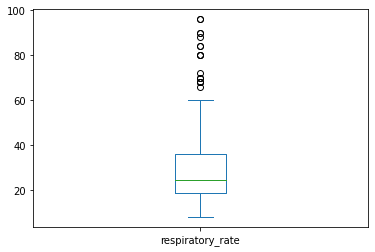

In [ ]:
X['respiratory_rate'].plot.box()

In [ ]:
X.isna().sum(axis=0)

surgery                        1
age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        1
dtype: int64

In [ ]:
100*X.isna().mean(axis=0)

surgery                        0.333333
age                            0.000000
rectal_temperature            20.000000
pulse                          8.000000
respiratory_rate              19.333333
temperature_of_extremities    18.666667
pain                          18.333333
outcome                        0.333333
dtype: float64

In [ ]:
X[X.outcome.isna()]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
X.dropna(subset=['surgery', 'outcome'], inplace=True)

In [ ]:
X.isna().sum(axis=0)

surgery                        0
age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        0
dtype: int64

In [ ]:
X.pain.value_counts()

3.0    67
2.0    59
5.0    42
4.0    38
1.0    38
Name: pain, dtype: int64

In [ ]:
X.pain = X.pain.fillna(X.pain.mode().squeeze())

In [ ]:
X.isna().sum(axis=0)

surgery                        0
age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                           0
outcome                        0
dtype: int64

In [ ]:
X.pulse = X.pulse.fillna(X.pain.median())

In [ ]:
X.isna().sum(axis=0)

surgery                        0
age                            0
rectal_temperature            60
pulse                          0
respiratory_rate              58
temperature_of_extremities    56
pain                           0
outcome                        0
dtype: int64

In [ ]:
X.groupby('surgery')['respiratory_rate'].median()

surgery
1.0    28.0
2.0    24.0
Name: respiratory_rate, dtype: float64

In [ ]:
resp_rate_medians = X.groupby('surgery')['respiratory_rate'].median()

In [ ]:
for s, rate_med in resp_rate_medians.items():
  X.loc[(X['surgery'] == s) & X['respiratory_rate'].isna(), 'respiratory_rate'] = rate_med

In [ ]:
X.isna().sum(axis=0)

surgery                        0
age                            0
rectal_temperature            60
pulse                          0
respiratory_rate               0
temperature_of_extremities    56
pain                           0
outcome                        0
dtype: int64

In [ ]:
X.rectal_temperature.value_counts()

38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
38.1    12
37.5    12
38.6    12
38.4    11
37.9     7
37.2     7
37.6     7
37.7     7
38.7     7
37.3     6
38.8     6
39.2     5
39.5     4
39.3     4
38.9     4
39.0     4
39.4     3
37.1     3
37.4     3
40.3     2
37.0     2
39.1     2
36.5     2
36.9     1
40.8     1
36.6     1
36.1     1
35.4     1
36.0     1
36.8     1
39.6     1
39.9     1
36.4     1
39.7     1
40.0     1
Name: rectal_temperature, dtype: int64

In [ ]:
X.rectal_temperature = X.rectal_temperature.fillna(X.rectal_temperature.mode().squeeze())

In [ ]:
X.isna().sum(axis=0)

surgery                        0
age                            0
rectal_temperature             0
pulse                          0
respiratory_rate               0
temperature_of_extremities    56
pain                           0
outcome                        0
dtype: int64

In [ ]:
X.groupby('surgery')['temperature_of_extremities'].median()

surgery
1.0    3.0
2.0    2.0
Name: temperature_of_extremities, dtype: float64

In [ ]:
temp_of_extr_medians = X.groupby('surgery')['temperature_of_extremities'].median()

In [ ]:
for s, temp_of_extr in temp_of_extr_medians.items():
  X.loc[(X['surgery'] == s) & X['temperature_of_extremities'].isna(), 'temperature_of_extremities'] = temp_of_extr

In [ ]:
X.isna().sum(axis=0)

surgery                       0
age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64

In [ ]:
X.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,2.0,3.0,2.0
